In [1]:
# uncomment if you need to install these modules on google colab
#!pip install researchpy
#!pip install pingouin

In [2]:
# from google.colab import files
# uploaded = files.upload()

In [3]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import researchpy as rp
import pingouin as pg
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score


In [4]:
data = pd.read_csv("Hotel Reservations.csv")
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [5]:
sample_size = 2000
data = data.sample(sample_size, random_state=12345) # so that i can make comments and the numbers stay constant
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
15750,INN15751,3,0,0,3,Meal Plan 1,0,Room_Type 1,79,2018,12,7,Offline,0,0,0,105.0,0,Not_Canceled
1830,INN01831,2,0,1,2,Meal Plan 1,0,Room_Type 1,19,2018,9,19,Offline,0,0,0,95.0,1,Not_Canceled
33732,INN33733,3,0,2,1,Meal Plan 1,0,Room_Type 4,62,2018,11,19,Online,0,0,0,126.0,3,Not_Canceled
22516,INN22517,2,2,2,2,Meal Plan 2,0,Room_Type 6,15,2018,6,19,Online,0,0,0,278.0,2,Not_Canceled
31900,INN31901,1,0,2,1,Meal Plan 1,0,Room_Type 1,2,2018,12,17,Corporate,0,0,0,65.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29284,INN29285,3,0,0,2,Meal Plan 1,0,Room_Type 1,127,2018,12,22,Online,0,0,0,90.0,3,Not_Canceled
5889,INN05890,2,0,2,1,Meal Plan 1,0,Room_Type 4,72,2018,4,3,Online,0,0,0,100.8,0,Canceled
21423,INN21424,2,0,0,2,Meal Plan 1,0,Room_Type 4,111,2018,8,11,Online,0,0,0,127.8,1,Not_Canceled
33498,INN33499,2,0,0,1,Not Selected,0,Room_Type 1,0,2018,6,10,Online,0,0,0,109.0,0,Not_Canceled


In [6]:
data['booking_status'].replace(['Canceled', 'Not_Canceled'],[1, 0], inplace=True)
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,2000.0,1.846000,0.520980,0.0,2.0,2.0,2.0,4.0
no_of_children,2000.0,0.114500,0.409235,0.0,0.0,0.0,0.0,3.0
no_of_weekend_nights,2000.0,0.800500,0.853853,0.0,0.0,1.0,1.0,5.0
no_of_week_nights,2000.0,2.201000,1.396271,0.0,1.0,2.0,3.0,15.0
required_car_parking_space,2000.0,0.034500,0.182555,0.0,0.0,0.0,0.0,1.0
lead_time,2000.0,83.621500,85.352919,0.0,16.0,56.0,124.0,443.0
arrival_year,2000.0,2017.828000,0.377475,2017.0,2018.0,2018.0,2018.0,2018.0
arrival_month,2000.0,7.495000,3.118788,1.0,5.0,8.0,10.0,12.0
arrival_date,2000.0,15.612500,8.756751,1.0,8.0,15.0,23.0,31.0
repeated_guest,2000.0,0.027500,0.163576,0.0,0.0,0.0,0.0,1.0


In [7]:
data.corr(method="pearson")

/tmp/ipykernel_83912/2809380959.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method="pearson")


,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
no_of_adults,1.000000,-0.018147,0.070346,0.107217,0.008552,0.092423,0.084006,0.002605,0.014765,-0.208565,-0.057769,-0.135436,0.284010,0.195391,0.104094
no_of_children,-0.018147,1.000000,0.051088,0.023612,0.027451,-0.032286,0.049832,-0.049133,0.015738,-0.039588,-0.017593,-0.026537,0.373328,0.148704,0.047344
no_of_weekend_nights,0.070346,0.051088,1.000000,0.164147,-0.061729,0.018917,0.020755,-0.024138,0.048131,-0.068150,-0.031897,-0.062060,-0.028884,0.029729,0.072802
no_of_week_nights,0.107217,0.023612,0.164147,1.000000,-0.060582,0.181336,-0.017897,0.040093,-0.003978,-0.118395,-0.023756,-0.077992,-0.021274,0.044183,0.108012
required_car_parking_space,0.008552,0.027451,-0.061729,-0.060582,1.000000,-0.093647,-0.000958,-0.037039,-0.004463,0.068726,0.002176,0.046918,0.049404,0.084383,-0.122558
lead_time,0.092423,-0.032286,0.018917,0.181336,-0.093647,1.000000,0.166211,0.116129,-0.015518,-0.142826,-0.052567,-0.094507,-0.079222,-0.095874,0.426207
arrival_year,0.084006,0.049832,0.020755,-0.017897,-0.000958,0.166211,1.000000,-0.338972,0.028709,-0.052986,-0.005344,0.006780,0.218127,0.035496,0.152257
arrival_month,0.002605,-0.049133,-0.024138,0.040093,-0.037039,0.116129,-0.338972,1.000000,-0.044756,0.035080,-0.040838,-0.018080,0.004023,0.098839,-0.021965
arrival_date,0.014765,0.015738,0.048131,-0.003978,-0.004463,-0.015518,0.028709,-0.044756,1.000000,-0.042498,-0.042059,-0.029897,0.020219,0.011775,0.009272
repeated_guest,-0.208565,-0.039588,-0.068150,-0.118395,0.068726,-0.142826,-0.052986,0.035080,-0.042498,1.000000,0.373823,0.607169,-0.181826,-0.015027,-0.112875


/tmp/ipykernel_83912/3427181675.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap="PiYG")


<AxesSubplot:>

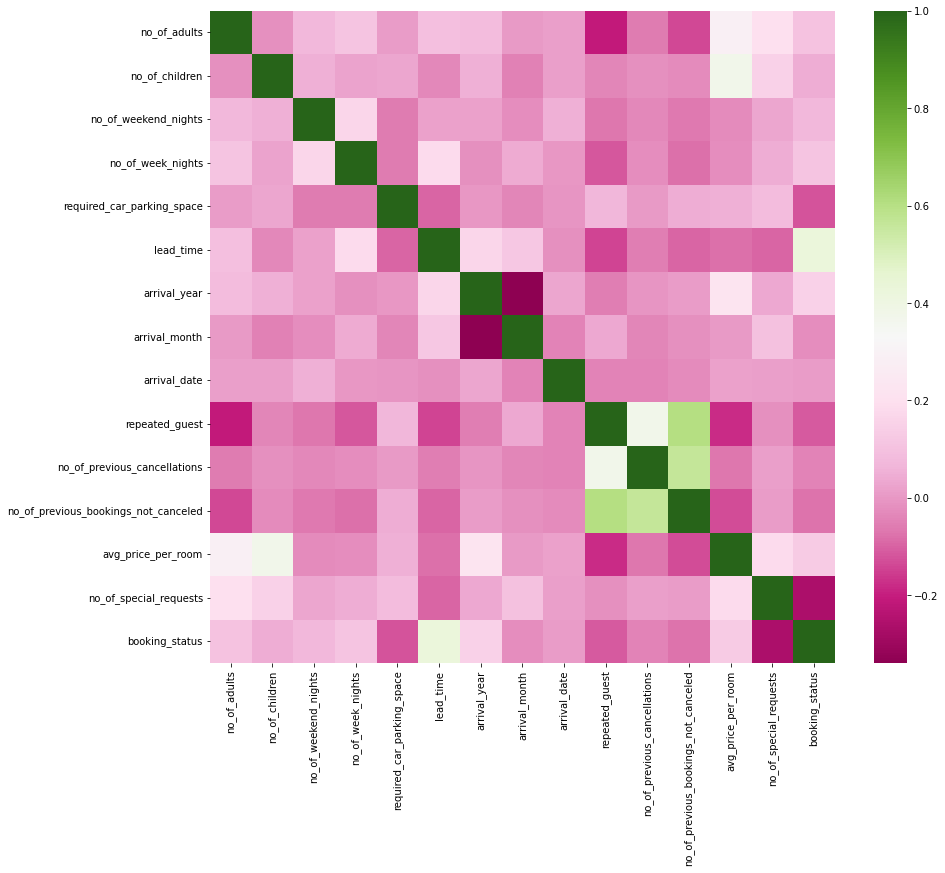

In [8]:
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), cmap="PiYG")

We can see in the above correlation matrix that booking status is correlated with a number of variables such as lead time and price per room


In [9]:
# sort into cancelled and not cancelled

cancelled = data.loc[data["booking_status"] == 1]
not_cancelled = data.loc[data["booking_status"] == 0]

cancelled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,670.0,1.922388,0.467100,0.0,2.0,2.0,2.0,3.0
no_of_children,670.0,0.141791,0.463189,0.0,0.0,0.0,0.0,2.0
no_of_weekend_nights,670.0,0.888060,0.908854,0.0,0.0,1.0,2.0,5.0
no_of_week_nights,670.0,2.413433,1.632297,0.0,1.0,2.0,3.0,15.0
required_car_parking_space,670.0,0.002985,0.054595,0.0,0.0,0.0,0.0,1.0
lead_time,670.0,134.862687,98.390146,0.0,51.0,116.5,194.0,443.0
arrival_year,670.0,2017.908955,0.287888,2017.0,2018.0,2018.0,2018.0,2018.0
arrival_month,670.0,7.398507,2.677649,1.0,5.0,8.0,10.0,12.0
arrival_date,670.0,15.726866,8.774795,1.0,8.0,15.0,24.0,31.0
repeated_guest,670.0,0.001493,0.038633,0.0,0.0,0.0,0.0,1.0


In [10]:
not_cancelled.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,1330.0,1.807519,0.542217,0.0,1.25,2.0,2.0,4.0
no_of_children,1330.0,0.100752,0.378603,0.0,0.00,0.0,0.0,3.0
no_of_weekend_nights,1330.0,0.756391,0.821582,0.0,0.00,1.0,1.0,4.0
no_of_week_nights,1330.0,2.093985,1.247798,0.0,1.00,2.0,3.0,8.0
required_car_parking_space,1330.0,0.050376,0.218802,0.0,0.00,0.0,0.0,1.0
lead_time,1330.0,57.808271,63.986102,0.0,9.00,37.0,83.0,386.0
arrival_year,1330.0,2017.787218,0.409429,2017.0,2018.00,2018.0,2018.0,2018.0
arrival_month,1330.0,7.543609,3.318776,1.0,5.00,8.0,10.0,12.0
arrival_date,1330.0,15.554887,8.750384,1.0,8.00,15.0,23.0,31.0
repeated_guest,1330.0,0.040602,0.197439,0.0,0.00,0.0,0.0,1.0


In [11]:
not_cancelled_lead_time = not_cancelled["lead_time"]
cancelled_lead_time = cancelled["lead_time"]



<AxesSubplot:ylabel='Density'>

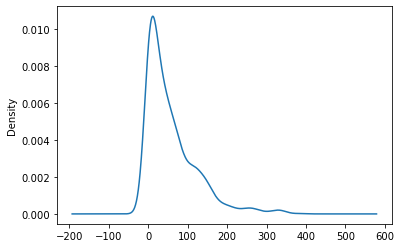

In [12]:
not_cancelled_lead_time.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

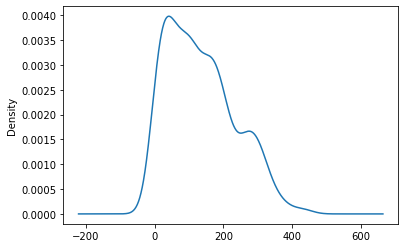

In [13]:
cancelled_lead_time.plot(kind="kde")

There is a visible difference between the two distributions, lets look at the mean and SD

In [14]:
nclt_std = not_cancelled_lead_time.std()
clt_std = cancelled_lead_time.std()
nclt_mean = not_cancelled_lead_time.mean()
clt_mean = cancelled_lead_time.mean()

print(f"Cancelled: mean:{clt_mean} STD:{clt_std}")
print(f"Not Cancelled: mean:{nclt_mean}  STD:{nclt_std}")


Cancelled: mean:134.8626865671642 STD:98.39014624277377
Not Cancelled: mean:57.80827067669173  STD:63.9861024050938


OK, at this point we have a hypothesis H1 that there is a significant difference between the mean of the 2 groups.
The null hypothesis H0 is that there is no difference between the 2 groups.

Now that we have seen the difference in the mean lead time between the 2 groups, lets do a t test to see if it is significant.

We are doing a Welch t test because the variance of the two groups is not the same (equal var = False)

In [15]:
x = stats.ttest_ind(cancelled_lead_time, not_cancelled_lead_time, equal_var=False)  
p = x.pvalue
t = x.statistic
print(x)

Ttest_indResult(statistic=18.405309414683124, pvalue=4.744999734987863e-65)


The p value is very low indicating that the difference is significant   
But is the effect strong? lets calculate R^2

In [16]:
t2 = t*t
df = sample_size -2 # degrees of freedom

r2 = np.sqrt( t2 / (t2 + df))
r2



0.3807470034056916

Clearly lead time is significant for predicting cancellations, longer lead times means higher chance of cancellation  

Lets now take a look at another example, avg price per room

mean:  100.5929097744361 std:  35.766393437174564


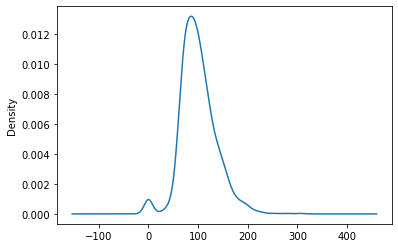

In [17]:
price_per_room = not_cancelled["avg_price_per_room"]
price_per_room.plot(kind="kde")
print("mean: ",price_per_room.mean(),"std: ",price_per_room.std())

mean:  110.15304477611942 std:  32.5646586885037


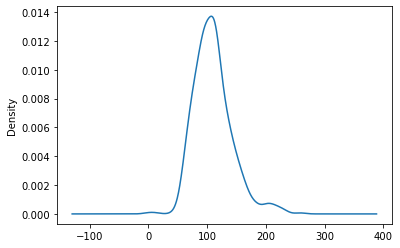

In [18]:
cancelled_price_per_room = cancelled["avg_price_per_room"]
cancelled_price_per_room.plot(kind="kde")
print("mean: ",cancelled_price_per_room.mean(),"std: ", cancelled_price_per_room.std())

The distributions look relatively similar here.

Once again we can see that there is a difference between the mean of each group, but it doesn't intuitively appear to be as large

In [19]:
x = stats.ttest_ind(cancelled_price_per_room,price_per_room, equal_var=False)  
p = x.pvalue
t = x.statistic
print(x)

Ttest_indResult(statistic=5.993134991986769, pvalue=2.589728916622923e-09)


In [20]:
# calculate effect size

t2 = t*t
df = sample_size -2 

r2 = np.sqrt( t2 / (t2 + df))
r2



0.13288849278159534

There is significance (p value is low) but the effect size is not so large. This isn't massive but could still be useful to know.



Now lets move on to doing some other tests
Lets see the relationship between meal choice and booking cancelations

In [21]:
#There are 3 options for meal choice in our data set
data["type_of_meal_plan"].unique()


array(['Meal Plan 1', 'Meal Plan 2', 'Not Selected'], dtype=object)

In [22]:
#convert to numbers we can work with
data['type_of_meal_plan'].replace(['Meal Plan 1', 'Meal Plan 2', 'Not Selected'],[1,2, 0], inplace=True)

not_selected = data.loc[data["type_of_meal_plan"]==0]
meal1 = data.loc[data["type_of_meal_plan"]== 1]
meal2 = data.loc[data["type_of_meal_plan"]==2]

In [23]:
# get an idea how many of each are in the sample. meal 2 has the fewest
meal2.count()

Booking_ID                              155
no_of_adults                            155
no_of_children                          155
no_of_weekend_nights                    155
no_of_week_nights                       155
type_of_meal_plan                       155
required_car_parking_space              155
room_type_reserved                      155
lead_time                               155
arrival_year                            155
arrival_month                           155
arrival_date                            155
market_segment_type                     155
repeated_guest                          155
no_of_previous_cancellations            155
no_of_previous_bookings_not_canceled    155
avg_price_per_room                      155
no_of_special_requests                  155
booking_status                          155
dtype: int64

We set the booking status to 1/0, so if we get the mean we can see the ratio (canceled == 1)


OK, we can see that there is a difference in the amount of cancelations between the groups, lets move on to the chi 

In [24]:
not_selected["booking_status"].mean()

0.3482758620689655

In [25]:
meal1["booking_status"].mean()

0.3170418006430868

In [26]:
meal2["booking_status"].mean()

0.49032258064516127

In [27]:
crosstab = rp.crosstab(data["type_of_meal_plan"], data["booking_status"], prop= "col")

crosstab

booking_status                
booking_status                 0       1     All
type_of_meal_plan                               
0                          14.21   15.07   14.50
1                          79.85   73.58   77.75
2                           5.94   11.34    7.75
All                       100.00  100.00  100.00

This isn't pretty lets do the other one 

In [28]:
rp.crosstab(data["type_of_meal_plan"], data["booking_status"], test= "chi-square")

(                  booking_status           
 booking_status                 0    1   All
 type_of_meal_plan                          
 0                            189  101   290
 1                           1062  493  1555
 2                             79   76   155
 All                         1330  670  2000,
                 Chi-square test  results
 0  Pearson Chi-square ( 2.0) =   19.2660
 1                    p-value =    0.0001
 2                 Cramer's V =    0.0981)

while the differences apears to be significant, with a very low p value (0.0001), the effect size is small; 0.098
So there is a significant difference amongst the 3 groups, but it is not big

Lets do one more test to see the correlation between meal choice and price per room

In [29]:
not_selected_price = not_selected["avg_price_per_room"]
meal1_price = meal1["avg_price_per_room"]
meal2_price = meal2["avg_price_per_room"]


118.00387096774193

36.747316438588925

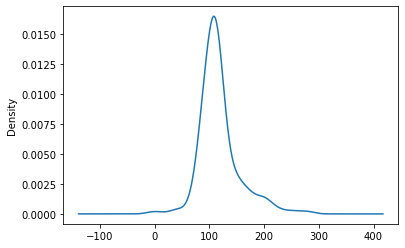

In [30]:
meal2_price.plot(kind="kde")
display(meal2_price.mean())
display(meal2_price.std())

103.96380064308681

36.07687486499602

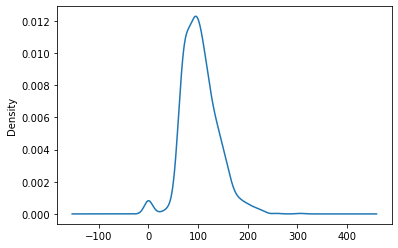

In [31]:
meal1_price.plot(kind="kde")
display(meal1_price.mean())
meal1_price.std()

95.29931034482759

24.071034285303416

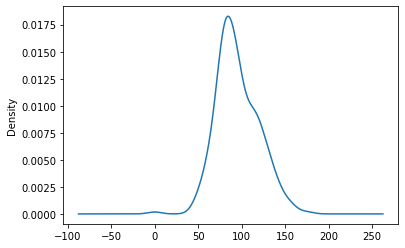

In [32]:
not_selected_price.plot(kind="kde")
display(not_selected_price.mean())
not_selected_price.std()

we can see that there is a difference in the average price per room between the 3 groups, meal 2 has the highest mean


Let's now do an anova test to see if these differences are significant. We use anova because there are 3 groups

In [33]:
stats.f_oneway(meal1_price, meal2_price, not_selected_price)

F_onewayResult(statistic=21.764130667846803, pvalue=4.461671188732753e-10)

yes they are significant, the p value is low, but there is quite a difference in variance between the groups.

we need to de a levene to see if the variance is significant

In [34]:
# Levene tests if SD is significant between groups, indicating that we need to use the Welsch Anova instead
stats.levene(meal1_price, meal2_price, not_selected_price)

LeveneResult(statistic=16.11808863444218, pvalue=1.137366262135121e-07)

The Levene test indicates that there is a significant difference in the SD between the 3 groups, thus our results are not valid. Lets move on to doing a Welch Anova so that we don't have to worry about this anymore

In [35]:
wanova = pg.welch_anova(data=data, dv='avg_price_per_room', between='type_of_meal_plan')
wanova

,Source,ddof1,ddof2,F,p-unc,np2
0,type_of_meal_plan,2,351.730382,27.996214,5.216110e-12,0.021332


We get a very low p value indicating that there is significance. However the effect size is small, so probably not worth worrying about

In [36]:
data

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
15750,INN15751,3,0,0,3,1,0,Room_Type 1,79,2018,12,7,Offline,0,0,0,105.0,0,0
1830,INN01831,2,0,1,2,1,0,Room_Type 1,19,2018,9,19,Offline,0,0,0,95.0,1,0
33732,INN33733,3,0,2,1,1,0,Room_Type 4,62,2018,11,19,Online,0,0,0,126.0,3,0
22516,INN22517,2,2,2,2,2,0,Room_Type 6,15,2018,6,19,Online,0,0,0,278.0,2,0
31900,INN31901,1,0,2,1,1,0,Room_Type 1,2,2018,12,17,Corporate,0,0,0,65.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29284,INN29285,3,0,0,2,1,0,Room_Type 1,127,2018,12,22,Online,0,0,0,90.0,3,0
5889,INN05890,2,0,2,1,1,0,Room_Type 4,72,2018,4,3,Online,0,0,0,100.8,0,1
21423,INN21424,2,0,0,2,1,0,Room_Type 4,111,2018,8,11,Online,0,0,0,127.8,1,0
33498,INN33499,2,0,0,1,0,0,Room_Type 1,0,2018,6,10,Online,0,0,0,109.0,0,0


Lets look at correlation between cancelations and special requests

In [37]:
pearsonr = stats.pearsonr(data['booking_status'],data['no_of_special_requests'])
pearsonr

(-0.2633867040525185, 4.3172600339789644e-33)

We can see that the p value is very low, so our results are significant. The correlation is -.26 so there is a strong negative correlation between amount of requests and cancelation and it is meaningful

In [38]:
data["room_type_reserved"].replace(['Room_Type 4', 'Room_Type 1', 'Room_Type 6', 'Room_Type 2',
       'Room_Type 5', 'Room_Type 7', 'Room_Type 3'],[4,1,6,2,5,7,3], inplace=True)


In [39]:
numerical_df = data[["no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","type_of_meal_plan","room_type_reserved","lead_time","repeated_guest",
                      "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "avg_price_per_room", "no_of_special_requests", "booking_status"]]
                      

In [40]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 15750 to 31001
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          2000 non-null   int64  
 1   no_of_children                        2000 non-null   int64  
 2   no_of_weekend_nights                  2000 non-null   int64  
 3   no_of_week_nights                     2000 non-null   int64  
 4   type_of_meal_plan                     2000 non-null   int64  
 5   room_type_reserved                    2000 non-null   int64  
 6   lead_time                             2000 non-null   int64  
 7   repeated_guest                        2000 non-null   int64  
 8   no_of_previous_cancellations          2000 non-null   int64  
 9   no_of_previous_bookings_not_canceled  2000 non-null   int64  
 10  avg_price_per_room                    2000 non-null   float64
 11  no_of_specia

In [41]:
numerical_df["avg_price_per_room"] = numerical_df["avg_price_per_room"].astype(int)

/tmp/ipykernel_83912/2396457137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df["avg_price_per_room"] = numerical_df["avg_price_per_room"].astype(int)


Now that we've converted everything, let's check the correlations

In [42]:
correlation = numerical_df.corr(method="pearson")
x = correlation.unstack()
sorted = x.sort_values(kind="quicksort")
with pd.option_context('display.max_rows', None,'display.max_columns', None,'display.precision', 3,):
  print(sorted)

booking_status                        no_of_special_requests                 -0.263
no_of_special_requests                booking_status                         -0.263
repeated_guest                        no_of_adults                           -0.209
no_of_adults                          repeated_guest                         -0.209
repeated_guest                        avg_price_per_room                     -0.181
avg_price_per_room                    repeated_guest                         -0.181
lead_time                             repeated_guest                         -0.143
repeated_guest                        lead_time                              -0.143
no_of_adults                          no_of_previous_bookings_not_canceled   -0.135
no_of_previous_bookings_not_canceled  no_of_adults                           -0.135
avg_price_per_room                    no_of_previous_bookings_not_canceled   -0.132
no_of_previous_bookings_not_canceled  avg_price_per_room                    

Now we read the data in again to use the full data set

we select the relevant columns and exclude useless data such as booking codes

In [43]:
# read data in again so we can get the full data set
data = pd.read_csv("Hotel Reservations.csv")

data = data[["no_of_adults","no_of_children",
             "no_of_weekend_nights",
             "no_of_week_nights",
             "type_of_meal_plan",
             "required_car_parking_space",
             "room_type_reserved",
             "lead_time",
             "repeated_guest",
             "no_of_previous_cancellations", 
             "no_of_previous_bookings_not_canceled", 
             "avg_price_per_room", 
             "no_of_special_requests", 
             "booking_status"]]

                      

In [44]:
data["type_of_meal_plan"].unique()

array(['Meal Plan 1', 'Not Selected', 'Meal Plan 2', 'Meal Plan 3'],
      dtype=object)

Create dummy variables for categorical data

we drop one of each category because they are unnecessary 
(if you have 4 meal options you only need 3 columns)

In [45]:
data = pd.get_dummies(data=data, columns=["type_of_meal_plan","room_type_reserved" , "booking_status"])
data.drop(columns=["booking_status_Not_Canceled", "type_of_meal_plan_Meal Plan 1", "room_type_reserved_Room_Type 1"], inplace=True)
data

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,...,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,booking_status_Canceled
0,2,0,1,2,0,224,0,0,0,65.00,...,0,0,0,0,0,0,0,0,0,0
1,2,0,2,3,0,5,0,0,0,106.68,...,0,0,1,0,0,0,0,0,0,0
2,1,0,2,1,0,1,0,0,0,60.00,...,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,0,0,0,100.00,...,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,0,0,0,94.50,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,3,0,2,6,0,85,0,0,0,167.80,...,0,0,0,0,0,1,0,0,0,0
36271,2,0,1,3,0,228,0,0,0,90.95,...,0,0,0,0,0,0,0,0,0,1
36272,2,0,2,6,0,148,0,0,0,98.39,...,0,0,0,0,0,0,0,0,0,0
36273,2,0,0,3,0,63,0,0,0,94.50,...,0,0,1,0,0,0,0,0,0,1


We want to predcict booking status based on all the other features



In [46]:
booking_status = data["booking_status_Canceled"]
data = data.drop(columns="booking_status_Canceled")

In [47]:
booking_status

0        0
1        0
2        1
3        1
4        1
        ..
36270    0
36271    1
36272    0
36273    1
36274    0
Name: booking_status_Canceled, Length: 36275, dtype: uint8

In [48]:
lm = pg.linear_regression(data, booking_status)
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.177,0.010,-17.081,0.000,0.301,0.3,-0.197,-0.156
1,no_of_adults,0.016,0.004,3.556,0.000,0.301,0.3,0.007,0.025
2,no_of_children,0.050,0.007,6.942,0.000,0.301,0.3,0.036,0.064
3,no_of_weekend_nights,0.026,0.002,10.611,0.000,0.301,0.3,0.021,0.031
4,no_of_week_nights,0.008,0.002,5.258,0.000,0.301,0.3,0.005,0.011
5,required_car_parking_space,-0.129,0.012,-10.707,0.000,0.301,0.3,-0.153,-0.106
6,lead_time,0.002,0.000,92.826,0.000,0.301,0.3,0.002,0.002
7,repeated_guest,-0.002,0.016,-0.102,0.919,0.301,0.3,-0.034,0.030
8,no_of_previous_cancellations,-0.007,0.006,-1.019,0.308,0.301,0.3,-0.019,0.006
9,no_of_previous_bookings_not_canceled,0.006,0.001,3.887,0.000,0.301,0.3,0.003,0.009


Our linear regression shows that there are a number of relevant correlated features. The r^2 is not very high though at 0.3

Lead time for example has a T of 93 with very low p value, so it is a useful feature

Ideally we should do more to improve this model, by checking for heteroskedacity, and checking for multicollinearity (in this case that doesn't appear to be a problem)

Let's drop the least relevant columns


In [49]:
data = data.drop(columns=
                ["room_type_reserved_Room_Type 2",
                "room_type_reserved_Room_Type 3",
                "room_type_reserved_Room_Type 4",
                "room_type_reserved_Room_Type 5",
                "room_type_reserved_Room_Type 6",
                "room_type_reserved_Room_Type 7",
                "repeated_guest",
                "no_of_adults",
                "no_of_previous_cancellations",
                "no_of_previous_bookings_not_canceled"], axis=1)



It doesn't seem to make such a big difference

In [50]:
lm = pg.linear_regression(data, booking_status)
lm.round(3)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.148,0.008,-18.667,0.000,0.298,0.298,-0.164,-0.133
1,no_of_children,0.016,0.005,2.954,0.003,0.298,0.298,0.005,0.027
2,no_of_weekend_nights,0.027,0.002,11.194,0.000,0.298,0.298,0.022,0.032
3,no_of_week_nights,0.009,0.002,5.862,0.000,0.298,0.298,0.006,0.012
4,required_car_parking_space,-0.127,0.012,-10.580,0.000,0.298,0.298,-0.151,-0.104
5,lead_time,0.002,0.000,94.804,0.000,0.298,0.298,0.002,0.002
6,avg_price_per_room,0.003,0.000,47.934,0.000,0.298,0.298,0.003,0.003
7,no_of_special_requests,-0.156,0.003,-57.428,0.000,0.298,0.298,-0.161,-0.151
8,type_of_meal_plan_Meal Plan 2,-0.081,0.008,-10.768,0.000,0.298,0.298,-0.096,-0.066
9,type_of_meal_plan_Meal Plan 3,0.300,0.176,1.703,0.089,0.298,0.298,-0.045,0.645


Let's move on to some other models

we scale the data to make it easier to work with

In [51]:
scaler = StandardScaler()
scaler.fit(data)
scaled_data = scaler.transform(data)
scaled_data

array([[-0.26147045,  0.2174012 , -0.14480303, ..., -0.31661119,
        -0.01174117, -0.40584903],
       [-0.26147045,  1.36599262,  0.56397175, ..., -0.31661119,
        -0.01174117,  2.46397039],
       [-0.26147045,  1.36599262, -0.85357781, ..., -0.31661119,
        -0.01174117, -0.40584903],
       ...,
       [-0.26147045,  1.36599262,  2.69029611, ..., -0.31661119,
        -0.01174117, -0.40584903],
       [-0.26147045, -0.93119021,  0.56397175, ..., -0.31661119,
        -0.01174117,  2.46397039],
       [-0.26147045,  0.2174012 , -0.14480303, ..., -0.31661119,
        -0.01174117, -0.40584903]])

split into training and testing data

In [52]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled_data, booking_status, test_size=0.33, random_state=41)

Let's just get an idea of how many canceled bookings there are out of the total data set, just to make sure there is enough data

In [53]:
display(ytrain.sum())
ytrain.shape

7982

(24304,)

8 out 24. This should be more than enough considering the size of our data set.


Not sure this next step is needed

In [54]:
ytest = ytest.astype(int)
train = ytrain.astype(int)

Lets just throw the kitchen sink at it

In [55]:
my_model = LogisticRegression().fit(xtrain, ytrain)
prediction = my_model.predict(xtest)
prediction

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

We have our prediction, now we need to see if it is any 


This is a hack, I'm sure there is a better way to put two data sets side by side

In [56]:
prediction = pd.DataFrame(prediction).reset_index(drop=True)

In [57]:
ytest = pd.DataFrame(ytest).reset_index(drop=True)

In [58]:
both = [ytest, prediction]
comparison_df = pd.concat(both, axis="columns")
comparison_df

,booking_status_Canceled,0
0,1,1
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
11966,0,0
11967,1,1
11968,0,0
11969,1,1


In [59]:
accuracy = accuracy_score(ytest, prediction)
accuracy

0.7854815804861749

Wonderful, but what if i just guessed that all bookings were not cancelled, have we improved?

In [60]:
canceled_bookings = booking_status.sum()
all_bookings = booking_status.shape[0]
percent = canceled_bookings / all_bookings

wrong = 1 - accuracy

print("we got wrong: ",wrong )
print("the percentage of all bookings that are canceled is ", percent)

improvement = percent - wrong

print("we imporved by", improvement)

we got wrong:  0.2145184195138251
the percentage of all bookings that are canceled is  0.32763611302549966
we imporved by 0.11311769351167456


I hope this math checks out, I should double check it lol